## import nesessery librery

In [37]:
from tensorflow import keras
from keras .models import Sequential
from keras.layers import Dense,Flatten
import numpy as np
from matplotlib import pyplot as plt

## load data

In [38]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

## show sample

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


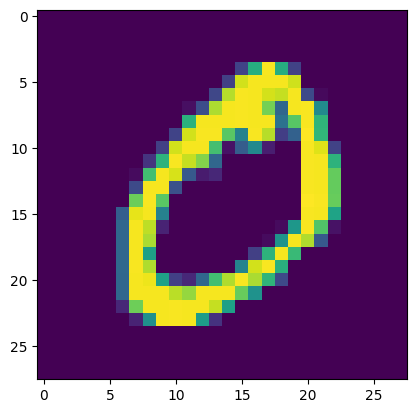

In [39]:
plt.imshow(x_train[1])
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

## normalization

In [40]:

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

#x_train=np.reshape(x_train, [-1,784])
#x_test=np.reshape(x_test, [-1,784])
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255




## model architecture

In [48]:
#model = Sequential()
#model.add(Dense(512, activation='relu', input_dim=784))
#model.add(Dense(10, activation='softmax'))
#model.summary()
#--------------------------------------------------------
model= Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 418,666 (1.60 MB)

 Trainable params: 418,666 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

## compile model

In [49]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## train model

In [50]:
history = model.fit(x_train, y_train,
          epochs=30,
          batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8658 - loss: 0.4518 - val_accuracy: 0.9605 - val_loss: 0.1343
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9676 - loss: 0.1074 - val_accuracy: 0.9602 - val_loss: 0.1356
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9803 - loss: 0.0656 - val_accuracy: 0.9738 - val_loss: 0.0853
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9867 - loss: 0.0441 - val_accuracy: 0.9722 - val_loss: 0.1014
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9912 - loss: 0.0311 - val_accuracy: 0.9775 - val_loss: 0.0831
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9926 - loss: 0.0228 - val_accuracy: 0.9789 - val_loss: 0.0884
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9954 - loss: 0.0164 - val_accuracy: 0.9802 - val_loss: 0.0946
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9960 - loss: 0.0115 - val_accuracy: 0.

## visualization

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


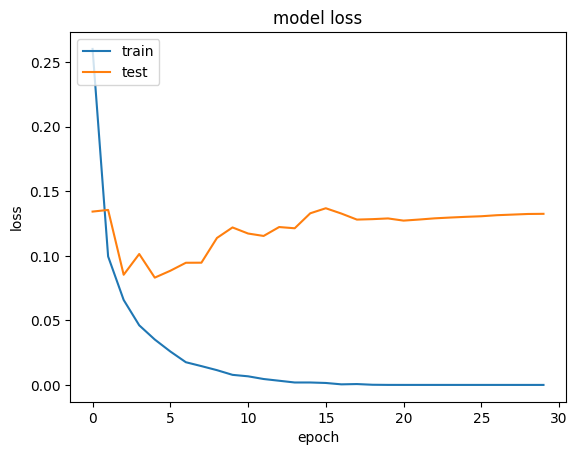

In [51]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

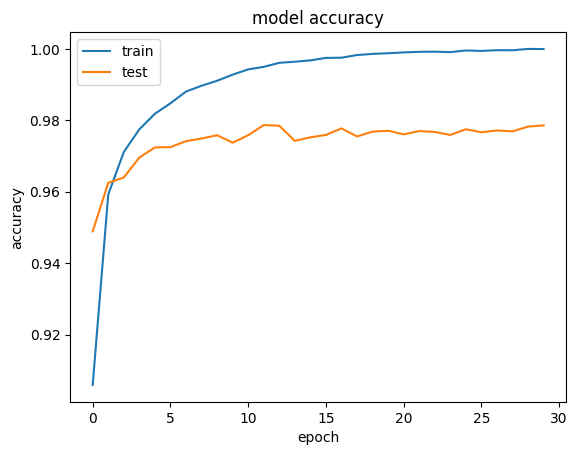

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## evaluate

In [52]:
loss, acc = model.evaluate(x_test, y_test)
print('Testing loss:',loss )
print('accuracy:',acc )

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9805 - loss: 0.1460
Testing loss: 0.11619533598423004
accuracy: 0.9839000105857849
